<a href="https://colab.research.google.com/github/adamlutzz/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [1]:
import random
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [2]:
from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])
example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [3]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [4]:
import numpy as np

np.random.normal(10,2)

8.464784501163976

In [5]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
#   time_on_site = random.uniform(10, 600)
  time_on_site = np.random.normal(9.4 * 60, 3 * 60)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
#   time_on_site = random.uniform(5, 300)
  time_on_site = np.random.normal(7.5 * 60, 2 * 60)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
users[:10]

[User(purchased=False, time_on_site=404.3162092337362, mobile=True),
 User(purchased=True, time_on_site=412.73297300830217, mobile=True),
 User(purchased=True, time_on_site=372.83852668641805, mobile=True),
 User(purchased=True, time_on_site=596.5595714823717, mobile=True),
 User(purchased=True, time_on_site=368.3093391220272, mobile=True),
 User(purchased=False, time_on_site=255.4599404514126, mobile=True),
 User(purchased=False, time_on_site=407.16439568876785, mobile=True),
 User(purchased=False, time_on_site=521.370369919528, mobile=True),
 User(purchased=False, time_on_site=588.6832951076083, mobile=True),
 User(purchased=True, time_on_site=382.4328479006018, mobile=True)]

In [6]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,False,404.316209,True
1,True,412.732973,True
2,True,372.838527,True
3,True,596.559571,True
4,True,368.309339,True


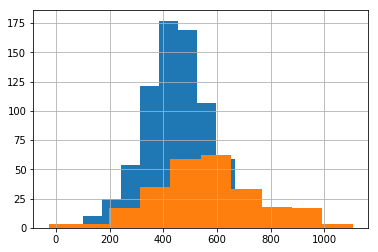

In [7]:
# user_data.time_on_site.hist();

# df[(df['price'] <=550000) & (df['num_bathrooms'] > 1 ) & (df['age'] < 20)]

mobile_user_data = user_data[(user_data['mobile'] == True)]
desk_user_data = user_data[(user_data['mobile'] == False)]

mobile_user_data.time_on_site.hist();
desk_user_data.time_on_site.hist();

user_data['time_on_site_min'] = user_data['time_on_site'] / 60



In [0]:
import matplotlib.pyplot as plt

# user_data.groupby('mobile').time_on_site  ***look at the lecture it is 8:56 PM***
# user_data.groupby('mobile').time_on_site_min.hist(bins=20, alpha=0.5, figure)

In [9]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,-26.97091586419117,62.150172218247235,69.9950596980562,102.61778061941709,103.49317137744129,116.4342875674896,144.67904810592177,146.0782129065833,147.96753186551973,158.7445993536747,166.21300503696068,167.56216745621907,168.1514212210903,173.12142941514406,179.30327728950778,179.58392554290361,180.1228614740519,182.671845122379,187.20563276220395,190.3237256191179,190.77055374523485,198.58200756148352,202.17294943636364,202.9604687186153,208.773282320678,212.18639061823845,213.07550768599958,218.08291803350417,218.1165101185215,222.24506636030497,223.2248854811826,225.09030968165652,227.0015732828426,230.08358217121844,231.02086183373387,231.11166446330702,231.79278090246447,232.22651031503528,235.49122543958575,235.76491310294463,...,770.1201238864453,772.6687498407198,775.4663963762629,779.1468073155615,779.9073523863211,780.9484624345088,790.3438120538206,791.765854973142,808.631748873584,808.8544998226723,810.3640780481002,825.8937524898034,830.9278970188884,838.7331821460733,841.9024284921677,845.1077607116158,861.490762741767,871.6403501128507,874.3395496857463,876.374821375354,879.5053845959158,886.1232246084769,897.1280691436634,898.1458193325823,898.8303997162518,905.6803143434381,907.4359185385822,911.0269799007854,913.0925808399868,915.1236575869177,917.5699242353905,920.2620538268984,921.638192817795,955.3474182331382,982.8159950616096,991.166509873807,991.4651619966235,1051.220068433652,1077.234452069127,1105.8696712249193
purchased,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1,1,1,0,0,1,0,1,1,1,0,1,1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0,1,1,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
True,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,1,1,1,1,...,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0


In [10]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site_min'], 5)  # 5 equal-sized bins
pd.crosstab(time_bins, user_data['purchased'], normalize='columns')

purchased,False,True
time_on_site_min,,
"(-0.468, 3.327]",0.033408,0.012704
"(3.327, 7.103]",0.405345,0.297641
"(7.103, 10.879]",0.474388,0.564428
"(10.879, 14.655]",0.075724,0.098004
"(14.655, 18.431]",0.011136,0.027223


In [11]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(time_bins, user_data['purchased'], normalize='columns')

purchased,False,True
time_on_site_min,,
"(-0.468, 3.327]",0.033408,0.012704
"(3.327, 7.103]",0.405345,0.297641
"(7.103, 10.879]",0.474388,0.564428
"(10.879, 14.655]",0.075724,0.098004
"(14.655, 18.431]",0.011136,0.027223


In [12]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.568,0.409333
True,0.432,0.590667


In [13]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?
# pd.crosstab(time_bins, user_data['purchased'], user_data['mobile'], normalize='columns') My attempt
pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']],normalize='columns')

purchased            False               True           
mobile               False     True      False     True 
time_on_site_min                                        
(-0.468, 3.327]   0.028169  0.035831  0.018519  0.011287
(3.327, 7.103]    0.267606  0.469055  0.129630  0.338600
(7.103, 10.879]   0.485915  0.469055  0.481481  0.584650
(10.879, 14.655]  0.183099  0.026059  0.231481  0.065463
(14.655, 18.431]  0.035211  0.000000  0.138889  0.000000

# Stanford Open Police Project

In [14]:
# !unzip tr137st9964_ca_anaheim_2019_02_25.csv.zip
# !ls

'''the next day I opened the file I just dragged the csv file into the google drive
so I did not need to unzip it.'''

'the next day I opened the file I just dragged the csv file into the google drive\nso I did not need to unzip it.'

In [15]:
%%time
df = 'ca_anaheim_2019_02_25.csv'


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [16]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

link = 'https://raw.githubusercontent.com/adamlutzz/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv'

df = pd.read_csv(link)
print(df.head())
df.shape


   Unnamed: 0  age  weight  exercise_time
0           0   44     118            192
1           1   41     161             35
2           2   46     128            220
3           3   39     216             57
4           4   28     116            182


(1200, 4)

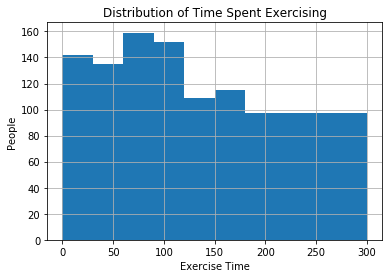

In [17]:
df['exercise_time'].hist()
plt.xlabel('Exercise Time')
plt.ylabel('People')
plt.title('Distribution of Time Spent Exercising')
plt.show()

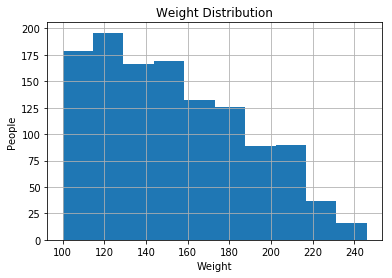

In [18]:
df['weight'].hist()
plt.xlabel('Weight')
plt.ylabel('People')
plt.title('Weight Distribution')
plt.show()

# not very many heavy people in this dataset

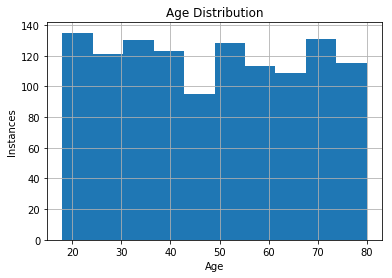

In [19]:
df['age'].hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Instances')
plt.show()

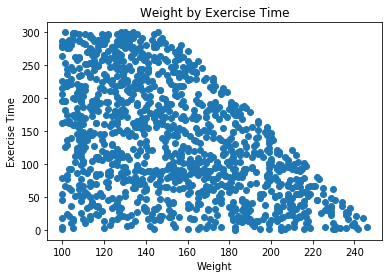

In [20]:
# lets see if exercise time affects how much someone weighs

plt.scatter(df['weight'], df['exercise_time'])
plt.title('Weight by Exercise Time')
plt.xlabel('Weight')
plt.ylabel('Exercise Time')
plt.show()

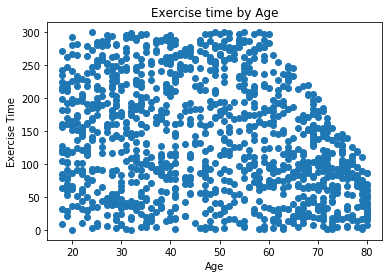

In [21]:
# lets see if older people are likely to exercise less

plt.scatter(df['age'], df['exercise_time'])
plt.title('Exercise time by Age')
plt.xlabel('Age')
plt.ylabel('Exercise Time')
plt.show()

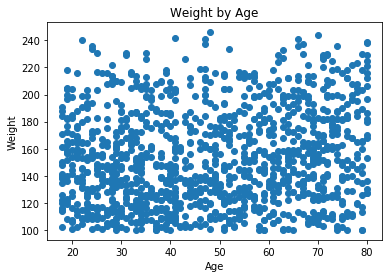

In [22]:
# lets see if weight goes up with age

plt.scatter(df['age'], df['weight'])
plt.title('Weight by Age')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

# there appears to be no correlation between weight and age

In [23]:
workout_time_bins = pd.cut(df['exercise_time'],5)
pd.crosstab(workout_time_bins, df['weight'])

weight,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,233,234,236,237,238,239,240,241,242,244,246
exercise_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(-0.3, 60.0]",5,0,1,1,2,3,1,0,1,2,2,2,2,4,1,0,3,3,1,2,2,0,1,1,3,1,2,5,1,1,2,2,0,2,0,1,2,1,0,3,...,4,5,3,3,1,4,4,4,2,3,2,4,1,6,2,5,2,0,0,2,0,1,1,3,1,1,5,2,3,1,2,3,2,1,1,1,2,1,1,1
"(60.0, 120.0]",1,1,2,2,2,0,2,2,2,4,4,0,1,3,2,0,4,2,1,2,0,4,5,3,4,2,3,0,3,4,1,3,2,1,2,4,4,3,2,3,...,4,7,2,1,1,5,2,3,2,4,2,5,1,3,1,1,1,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
"(120.0, 180.0]",1,2,3,2,1,2,2,4,6,3,5,3,2,2,3,2,2,0,1,2,3,1,0,1,6,5,4,1,1,1,0,2,1,1,2,3,2,5,5,4,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(180.0, 240.0]",4,5,3,0,2,1,1,3,4,4,2,2,1,5,1,2,3,3,2,2,2,3,2,2,2,3,4,1,5,5,1,4,2,1,2,2,5,4,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(240.0, 300.0]",4,2,4,3,2,4,2,2,6,0,1,3,2,6,4,4,3,6,1,3,6,1,5,2,2,7,4,8,7,3,4,3,4,4,5,3,2,6,3,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
import seaborn as sns

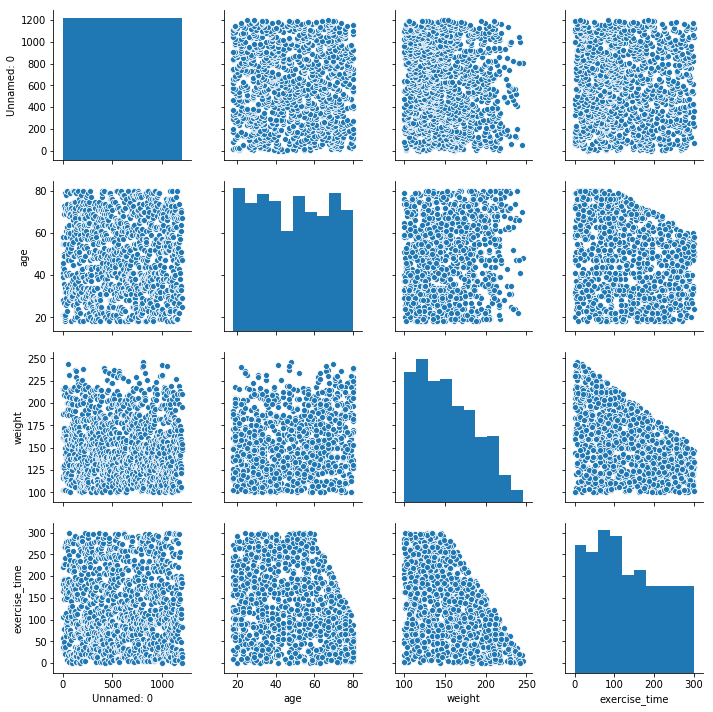

In [25]:
# ran this at the suggestion of Tally

sns.pairplot(df)

In [0]:
# !pip install pandas==0.23.4

# df['weight_bins'] = pd.cut(df['weight'],5)

# pd.crosstab(workout_time_bins, df['weight_bins'], normalize='columns')

# print(weight_bins.value_counts())


In [26]:
# Creating a feature that classifies each weight group into bins

df['weight_groups'] = np.where((df['weight'] >= 99) & (df['weight'] <= 129.19), 1,
                      np.where((df['weight'] >= 129.2) & (df['weight'] <= 157.39), 2,
                      np.where((df['weight'] >= 157.4) & (df['weight'] <= 187.59), 3,
                      np.where((df['weight'] >= 187.6) & (df['weight'] <= 216.79), 4,
                      np.where((df['weight'] >= 216.8) & (df['weight'] <= 246.0), 5, 'none')))))
df.head()                              

,Unnamed: 0,age,weight,exercise_time,weight_groups
0,0,44,118,192,1
1,1,41,161,35,3
2,2,46,128,220,1
3,3,39,216,57,4
4,4,28,116,182,1


In [27]:
pd.crosstab(workout_time_bins, df['weight_groups'], normalize='columns')

weight_groups,1,2,3,4,5
exercise_time,,,,,
"(-0.3, 60.0]",0.141333,0.135802,0.226766,0.424581,0.830189
"(60.0, 120.0]",0.173333,0.225309,0.356877,0.407821,0.169811
"(120.0, 180.0]",0.189333,0.194444,0.223048,0.162011,0.000000
"(180.0, 240.0]",0.210667,0.222222,0.148699,0.005587,0.000000
"(240.0, 300.0]",0.285333,0.222222,0.044610,0.000000,0.000000


### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


## Answers

1. I think there are all independant variables
2. I think that to some degree weight is related to exercise time. The higher the weight the less exercise time.
3. I think there is a real relationship between weight and exercise time and age and exercise time.
      The relationship between age and weight was spurious


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)